In [1]:
import numpy as np
import pandas as pd

import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline

### 【問題1】データセットの取得
pd.read_csv()を使用して、変数に格納してください。

In [2]:
df_train = pd.read_csv('train.csv')

### 【問題2】データセット自体の調査
KaggleのOverviewページや、Dataページの「Data fields」などを読みながら、どのようなデータセットかを説明してください。

#### Start here if...
You have some experience with R or Python and machine learning basics. \
This is a perfect competition for data science students who have completed an online course in machine learning and are looking to expand their skill set before trying a featured competition. 

#### Competition Description


Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. \
But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

#### Practice Skills
Creative feature engineering \
Advanced regression techniques like random forest and gradient boosting

#### Acknowledgments
The Ames Housing dataset was compiled by Dean De Cock for use in data science education. \
It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. 

#### ここからスタート。もし...
- RかPython及び機械学習基礎に多少の経験有り。
- 機械学習のオンラインコースを完了しており、Featuredコンペに入る前にスキルを拡張したいデータサイエンスの学生にとって最適なコンペである。

#### コンペ詳細
住宅購入者に希望する住宅の詳細を尋ねたら、おそらく東西の鉄道の近接や地下室の天井の高さから語り始める者はいないだろう。\
しかしながら、この学び場としてのコンペデータセットは、ベッドルームの数や白い囲い柵以上に価格交渉への影響を示す事であろう。

アイオワ州エイムズの住宅におけるほぼ全ての特徴を描写する79件の説明変数と共に、このコンペは各住宅の__最終価格を予測する__事を求める。

#### 実技
- クリエイティブな特徴エンジニアリング
- ランダムフォレスト及び勾配ブースティングのような高度な回帰テクニック

#### 謝意
省略

「Data fields」は、data_description.txtに詳細の記述有り。

### 【問題3】データの確認
データを確認していきます。コードとマークダウンを組み合わせてレポートしてください。


- 各特徴量がどういったものかを見る。（数値データか文字データなど）
- 今回の目的変数はどの列か確認する。
- 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

- 各特徴量がどういったものかを見る。（数値データか文字データなど）

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.shape

(1460, 81)

説明変数は79列との事であるが、81列存在する。\
ID列及び目的変数であるSalePrice列の2列が含まれているためである。

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

数値変数：38列\
カテゴリ変数：43列\
1460行のデータに対して、1460行を満たしていないデータが多数存在する。

- 今回の目的変数はどの列か確認する。

In [6]:
df_train['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [7]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

- 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

In [8]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### 【問題4】欠損値への対応
欠損値に関して以下のことを行い、レポートしてください。


- 各特徴量の欠損値の有無を確認する。

欠損値の確認にはmissingnoというライブラリを活用しましょう。このライブラリにより欠損値の有無が可視化できます。インストールや使い方に関しては以下のページをご覧ください。


[ResidentMario/missingno: Missing data visualization module for Python.](https://github.com/ResidentMario/missingno)


- 欠損値が何パーセント含まれるかを確認する。
- 5つ以上欠損値がある特徴量（列）は削除する。
- 欠損値があるサンプル（行）は削除する。

- 各特徴量の欠損値の有無を確認する。

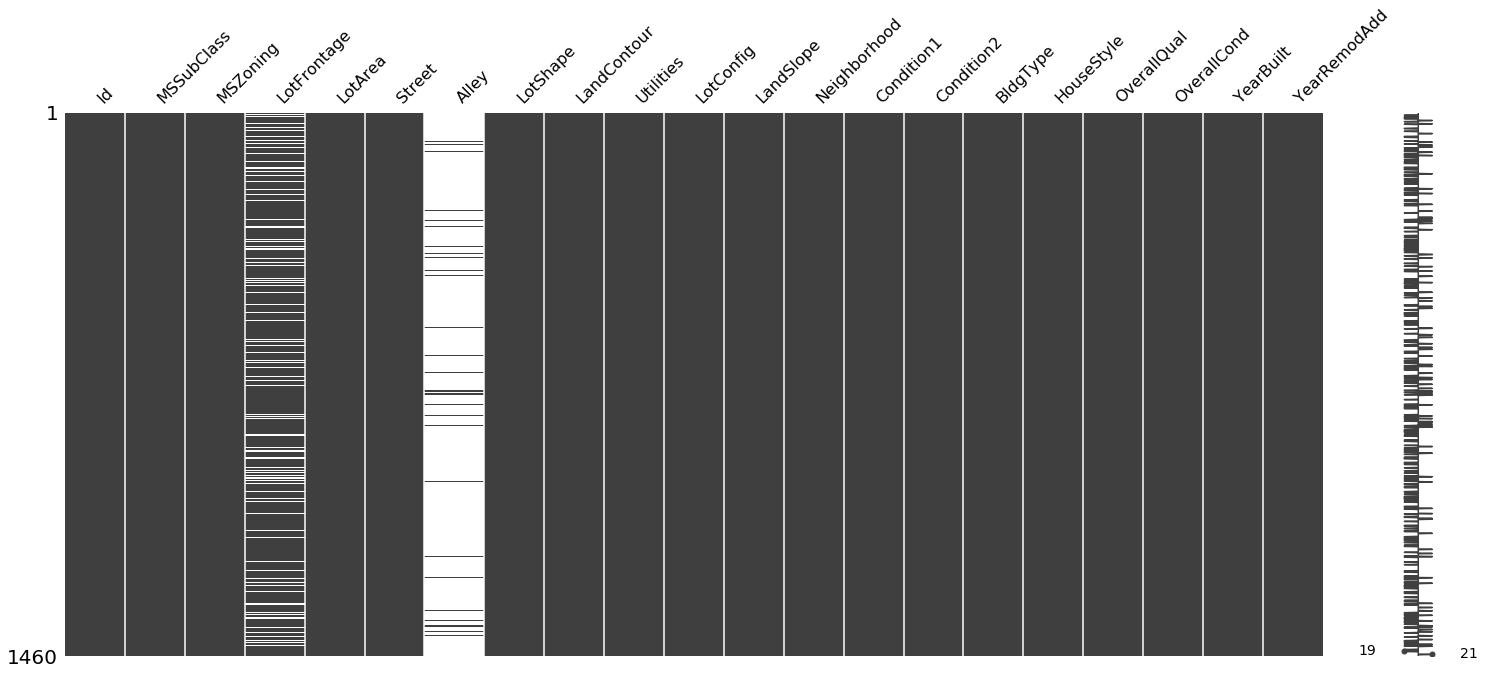

In [9]:
msno.matrix(df_train.iloc[:, 0:21])

19 - 21列の非欠損値を持つとの事。∴ 0 - 2列の欠損値有り(LofFrontage, Alley)。

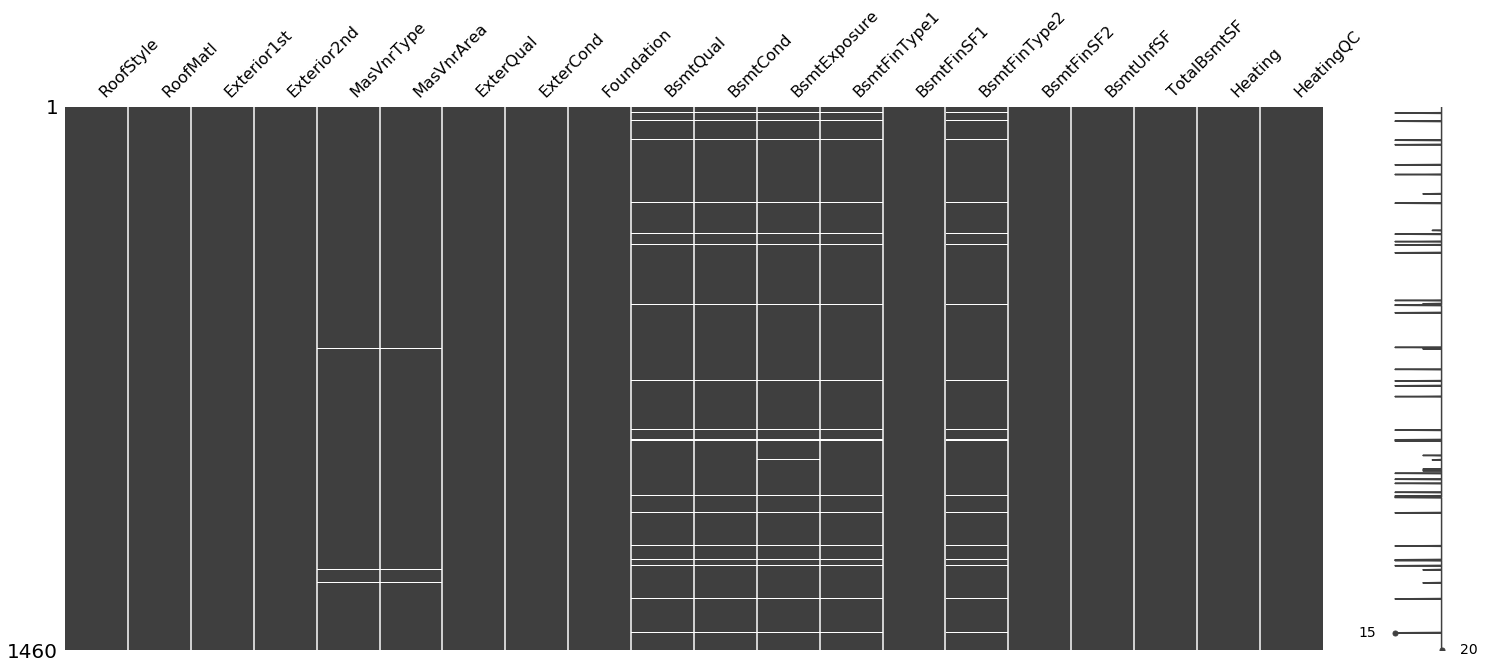

In [10]:
msno.matrix(df_train.iloc[:, 21:41])

15 - 20列の非欠損値を持つとの事。∴ 0 - 5列の欠損値有り。

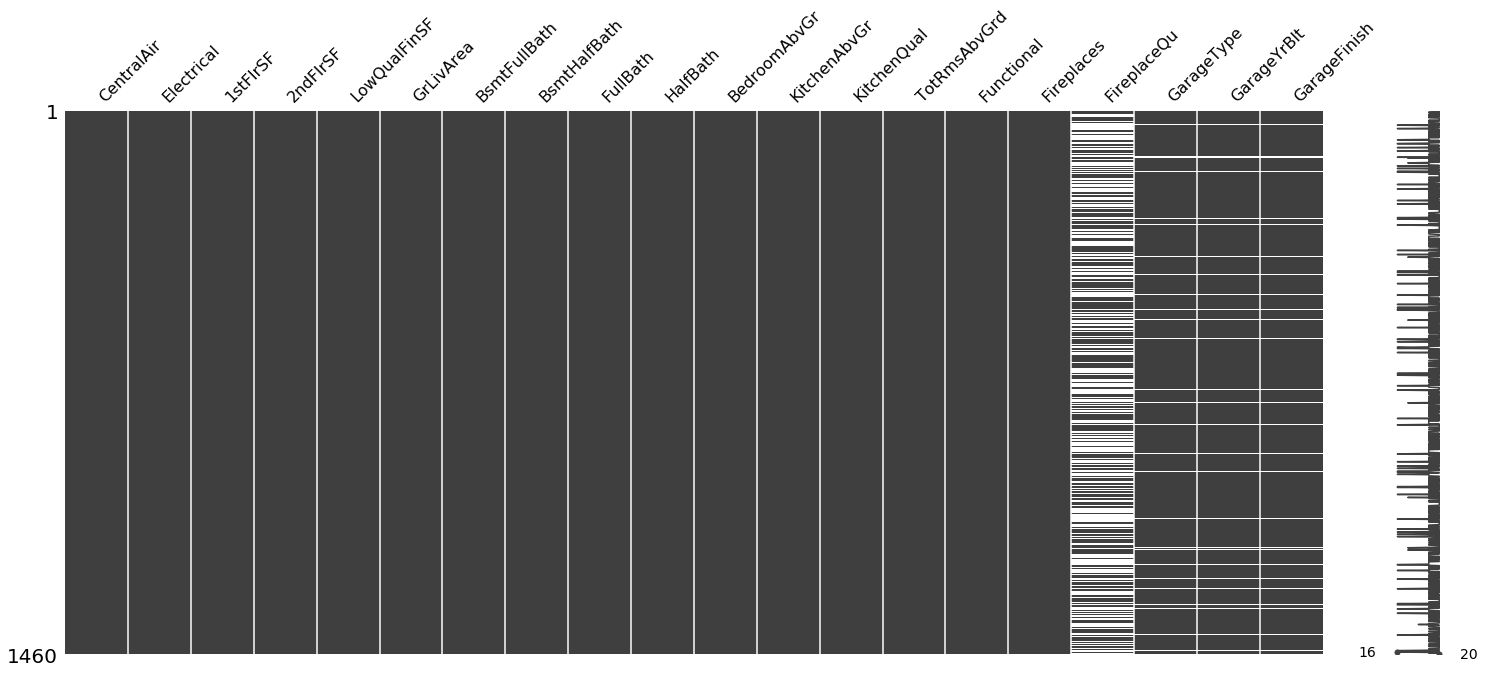

In [11]:
msno.matrix(df_train.iloc[:, 41:61])

16 - 20列の非欠損値を持つとの事。∴ 0 - 4列の欠損値有り。

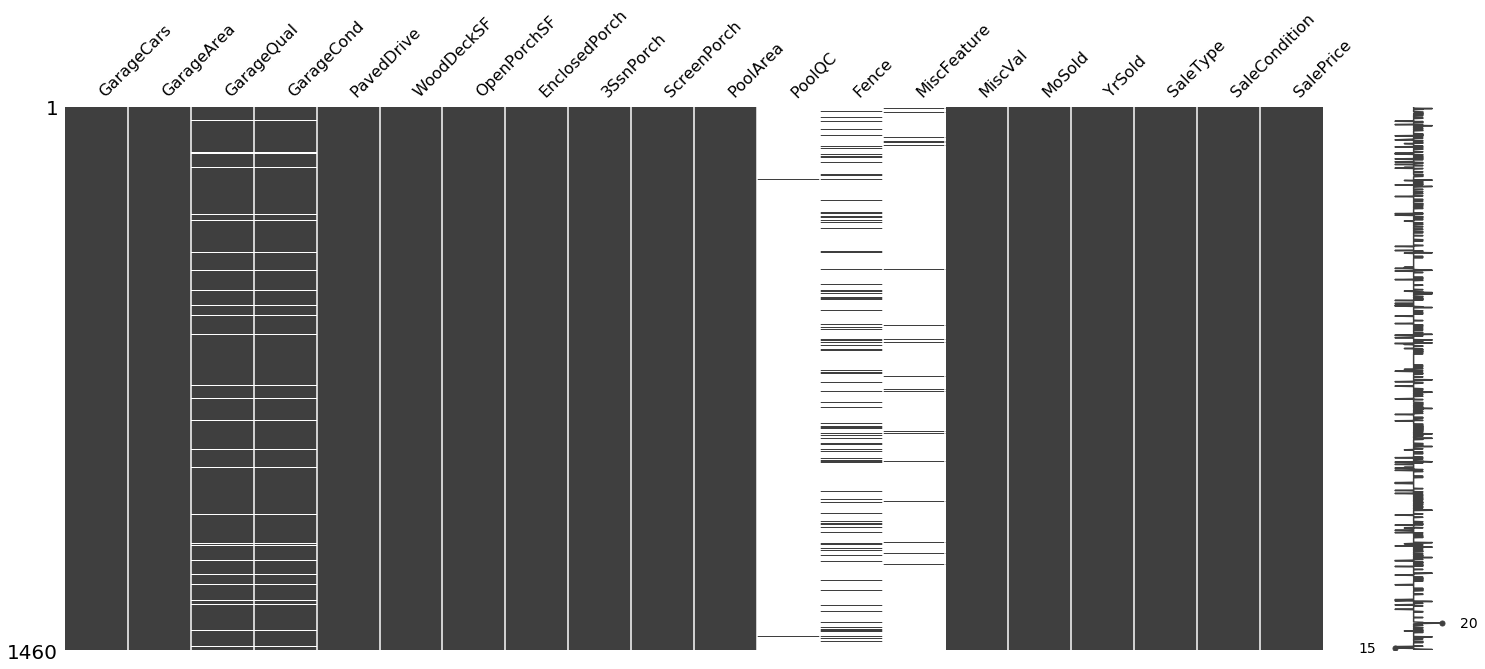

In [12]:
msno.matrix(df_train.iloc[:, 61:82])

15 - 20列の非欠損値を持つとの事。∴ 0 - 5列の欠損値有り。

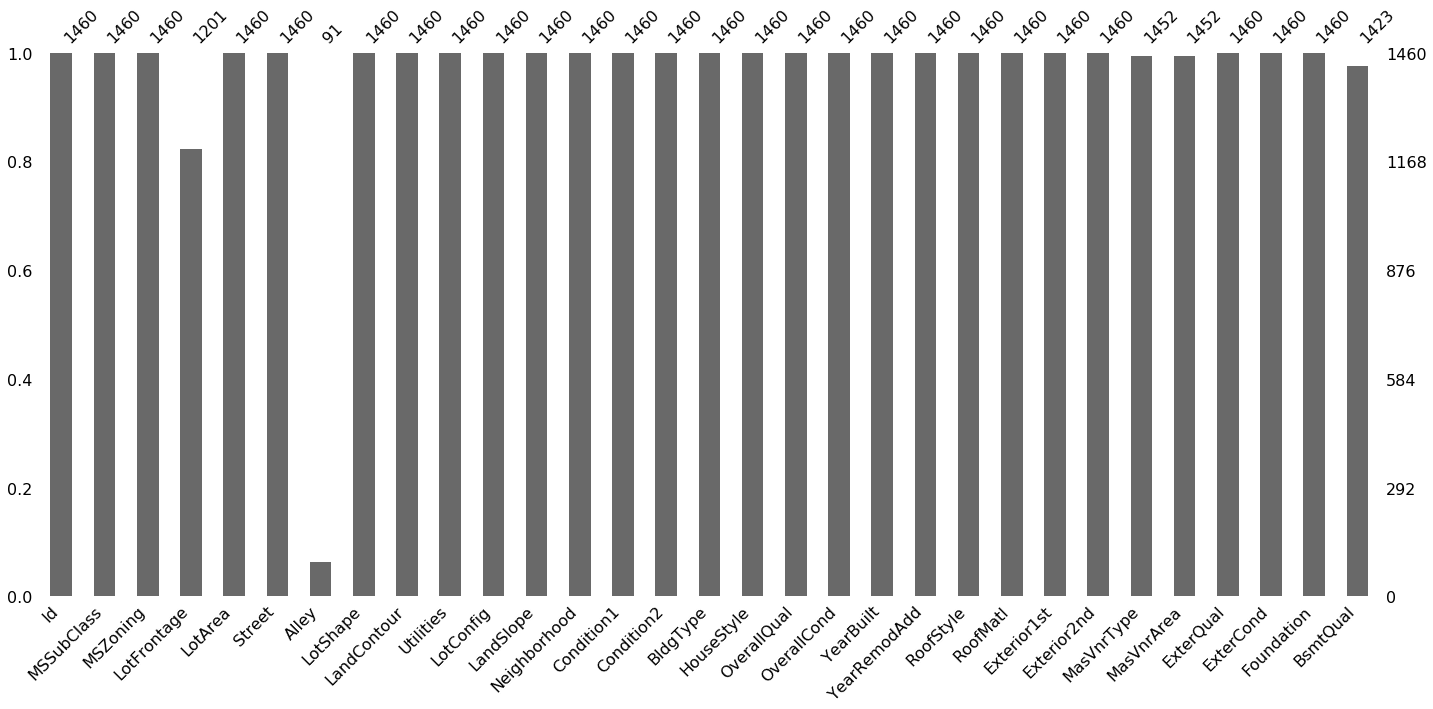

In [13]:
msno.bar(df_train.iloc[:, :31])

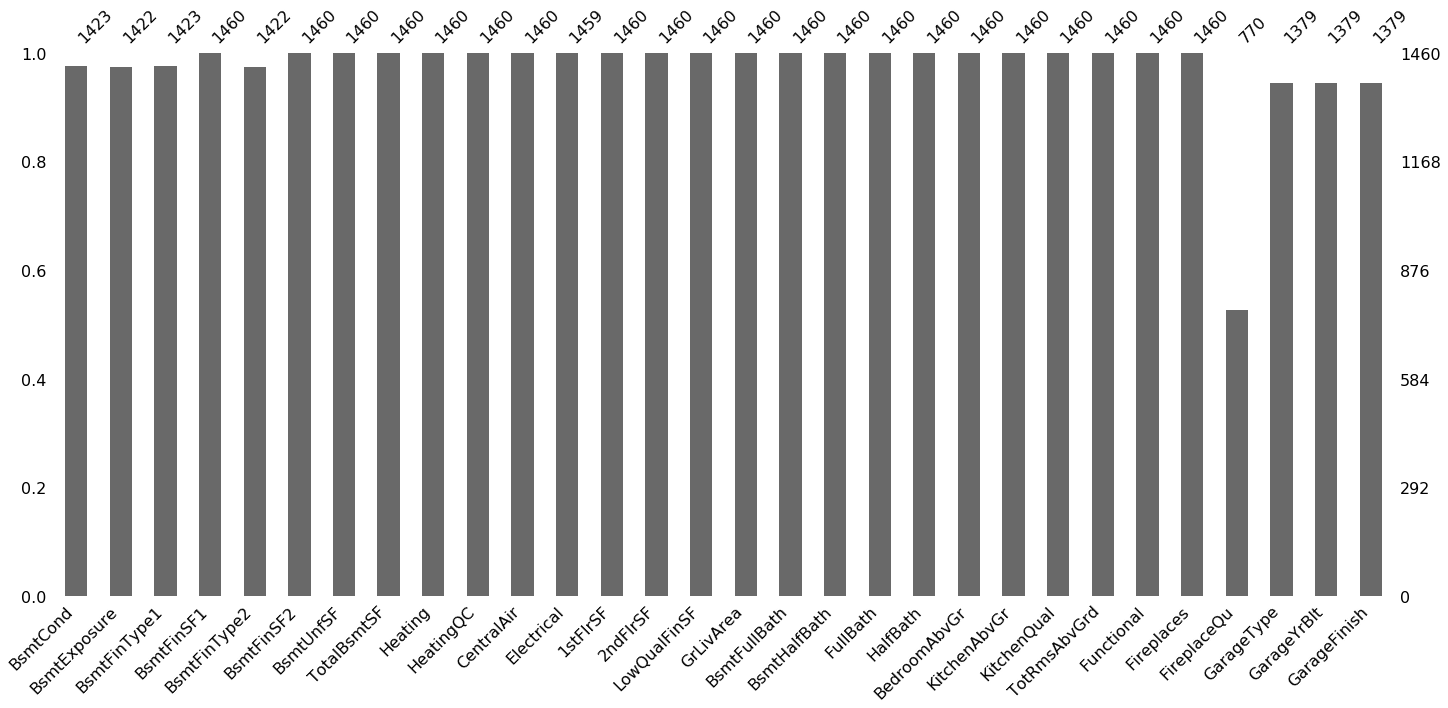

In [14]:
msno.bar(df_train.iloc[:, 31:61])

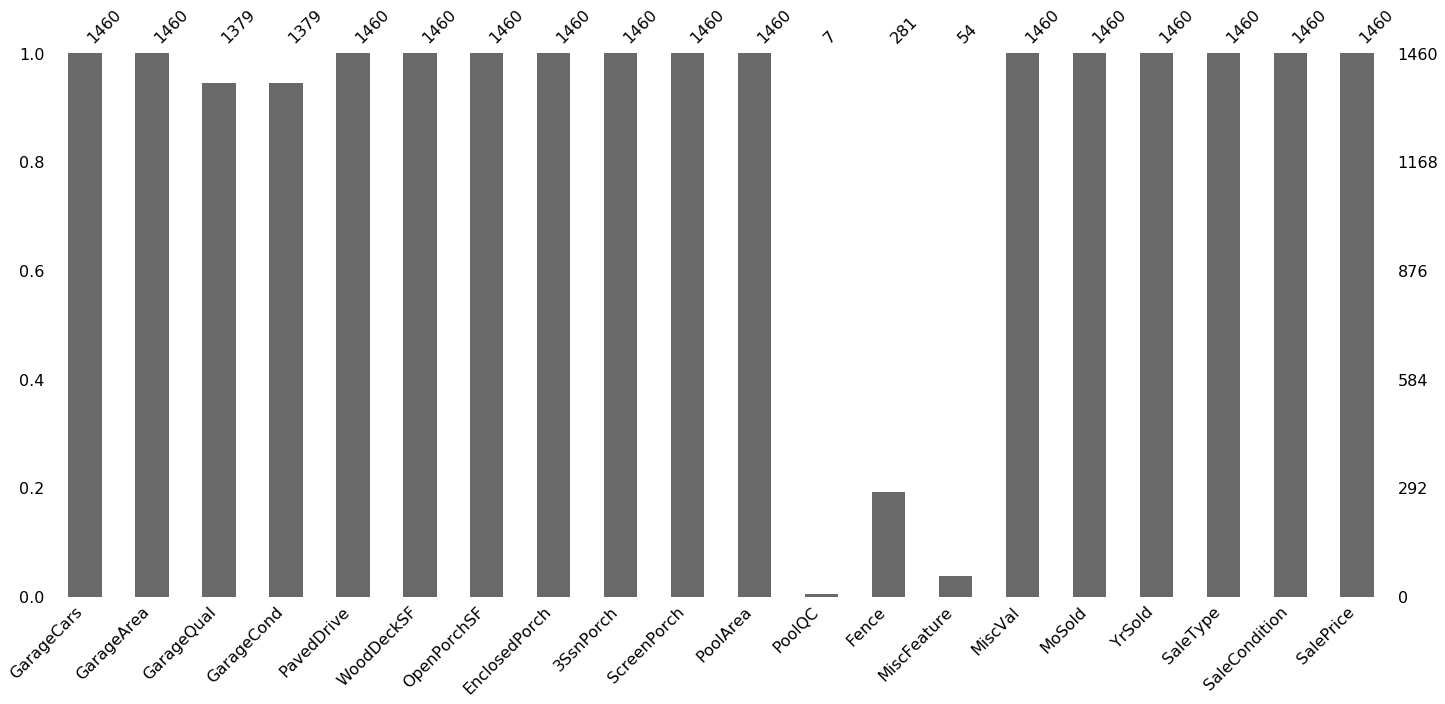

In [15]:
msno.bar(df_train.iloc[:, 61:82])

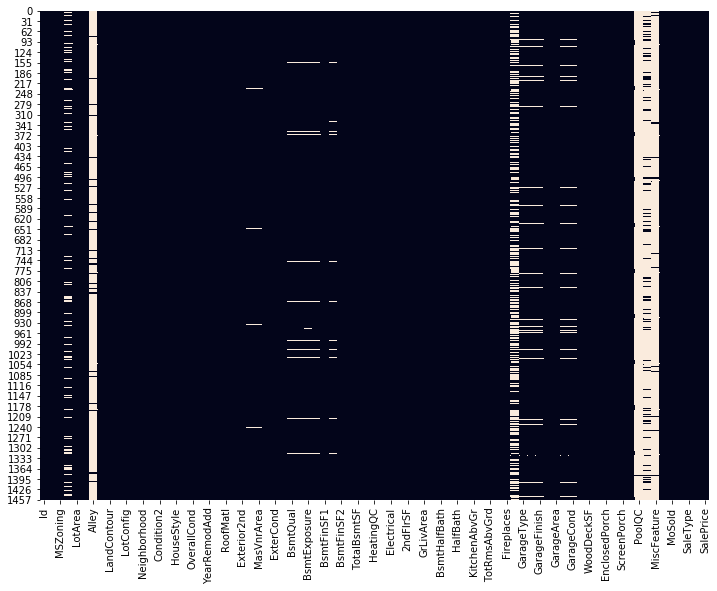

In [16]:
plt.figure(figsize=(12, 9))  
sns.heatmap(df_train.isnull(), cbar=False)

- 欠損値が何パーセント含まれるかを確認する。

In [17]:
pd.options.display.float_format = '{: <10.2%}'.format

total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(sum(total > 0))

,Total,Percent
PoolQC,1453,99.52%
MiscFeature,1406,96.30%
Alley,1369,93.77%
Fence,1179,80.75%
FireplaceQu,690,47.26%
LotFrontage,259,17.74%
GarageCond,81,5.55%
GarageType,81,5.55%
GarageYrBlt,81,5.55%
GarageFinish,81,5.55%


- 5つ以上欠損値がある特徴量（列）は削除する。

In [18]:
print("削除対象列:" + str(sum(total >= 5)) + "列")

削除対象列:18列


In [19]:
print("削除前:" + str(df_train.shape))

削除前:(1460, 81)


In [20]:
df_copy =  df_train.copy()

In [21]:
df_train.drop([del_col for del_col in missing_data.index if missing_data.loc[del_col, 'Total'] >= 5], axis=1, inplace=True)

In [22]:
print("削除後:" + str(df_train.shape))

削除後:(1460, 63)


- 欠損値があるサンプル（行）は削除する。

In [23]:
total.index[(total > 0) & (total < 5)]

Index(['Electrical'], dtype='object')

In [24]:
del_index = df_train.index[df_train['Electrical'].isnull()]

In [25]:
print("削除前:" + str(df_train.shape))

削除前:(1460, 63)


In [26]:
df_train.drop(del_index, axis=0, inplace=True)

In [27]:
print("削除後:" + str(df_train.shape))

削除後:(1459, 63)


### 【問題5】用語の調査
以下の２つの単語を知る必要があります。これらを調査してまとめてください。


- 尖度
- 歪度

- 尖度

分布が正規分布からどれだけ尖っているかを表す統計量で、山の尖り度と裾の広がり度を示している。\
平均まわりの四次モーメントを標準偏差で正規化したものである。

$$
\frac{1}{n}\sum^{n}_{i=1}\begin{pmatrix}\frac{x_i-\mu}{\sigma_x}\end{pmatrix}^4-3
$$

正規分布より尖った分布(Tall):正の値\
正規分布より扁平な分布(Flat):負の値\
正規分布の場合:0

- 歪度

分布が正規分布からどれだけ歪んでいるかを表す統計量で、左右対称性を示す指標の事である。\
平均まわりの三次モーメントを標準偏差で正規化したものである。

$$
\frac{1}{n}\sum^{n}_{i=1}\begin{pmatrix}\frac{x_i-\mu}{\sigma_x}\end{pmatrix}^3
$$

右に歪んだ分布(Positive)：正の値\
左に歪んだ分布(Negative)：負の値\
左右対称の分布：0

平均値より大きな値のデータがあれば、「xi-μ」が正の値となり右に歪んだ分布になる傾向性は想像である。\
標準偏差で標準化されている。

- 共通

べき乗の数が奇数であれば左右に振れる分布，偶数であれば上下に振れる分布のイメージである。

### 【問題6】分布の確認
- seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。
- 目的変数に対して対数変換を行う。
- 対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。

対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。このように加工することで予測時の精度を上げることができます。

- seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。

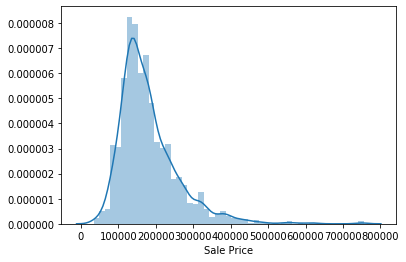

In [28]:
sns.distplot(df_train['SalePrice'], axlabel='Sale Price')

正規分布ではなく、右に歪んで尖った分布に見える。

In [29]:
print("歪度(Skewness) :", df_train['SalePrice'].skew())
print("尖度(Kurtosis) :", df_train['SalePrice'].kurt())

歪度(Skewness) : 1.8819429948035529
尖度(Kurtosis) : 6.529263049673958


観察通り、歪度及び尖度は、正の値を示している。

- 目的変数に対して対数変換を行う。

In [30]:
pd.reset_option('display.float_format')
df_train['SalePrice_Log'] = df_train['SalePrice'].apply(np.log)
df_train['SalePrice_Log'].head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice_Log, dtype: float64

- 対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。

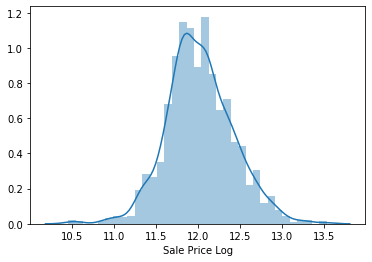

In [31]:
sns.distplot(df_train['SalePrice_Log'], axlabel='Sale Price Log')

正規分布に見える。

In [32]:
print("歪度(Skewness) :", df_train['SalePrice_Log'].skew())
print("尖度(Kurtosis) :", df_train['SalePrice_Log'].kurt())

歪度(Skewness) : 0.12131775882415026
尖度(Kurtosis) : 0.806927847502148


観察通り、歪度及び尖度は、0により近い値を示している。

### 【問題7】相関係数の確認
特徴量の確認をしていきます。それぞれに対してマークダウンで説明や考察を書いてください。


- 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。
- 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。
- 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。
- 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。

《補足》


重回帰分析などで予測する場合、相関が高すぎる特徴量の組み合わせがあると予測に悪影響が出ることがあります。このような場合の簡単な対処方法として、そういった特徴量の組みを探し出して、１つに絞るということがあります。

- 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。

In [33]:
corr_matrix = df_train.corr()

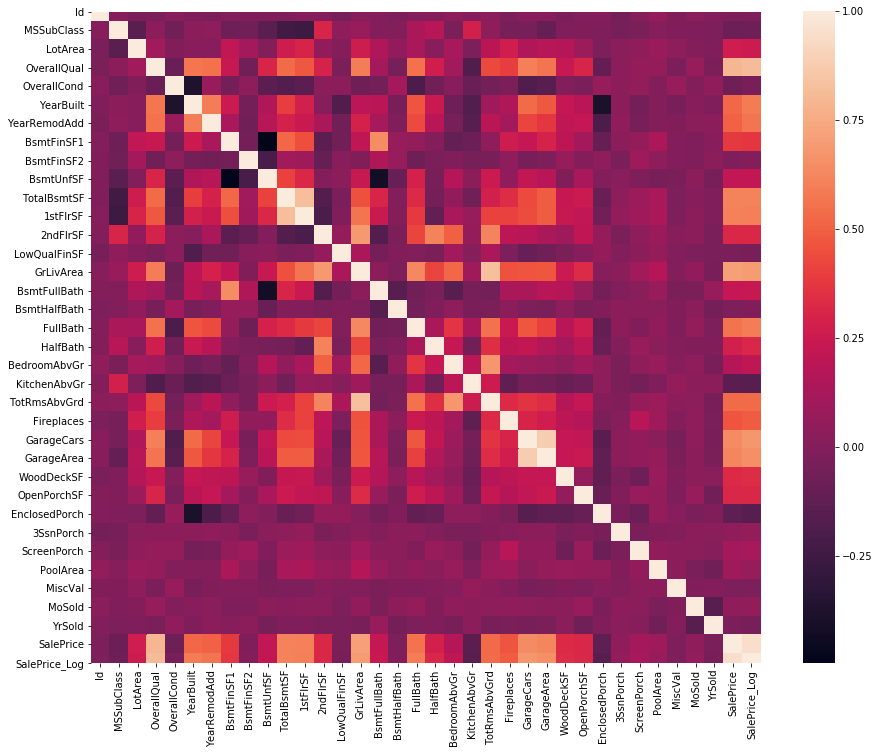

In [34]:
plt.figure(figsize=(15, 12))  
sns.heatmap(corr_matrix, square=True)

- 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。

In [35]:
corr_y = pd.DataFrame({'features':corr_matrix.columns,
                       'objective_variable':corr_matrix['SalePrice_Log']},
                      index=None)
corr_y = corr_y.reset_index(drop=True)
corr_y.style.background_gradient()

,features,objective_variable
0,Id,-0.0179694
1,MSSubClass,-0.073971
2,LotArea,0.257321
3,OverallQual,0.817368
4,OverallCond,-0.0368672
5,YearBuilt,0.586827
6,YearRemodAdd,0.565822
7,BsmtFinSF1,0.372152
8,BsmtFinSF2,0.00483487
9,BsmtUnfSF,0.222001


In [36]:
high_corr_series = corr_y['objective_variable'].abs().sort_values(ascending=False) #絶対値の降順で並び替え
top_ten_corr_matrix = list()
for i in high_corr_series[2:12].index: #SalePrice_Log,SalePriceを除くトップ10
    top_ten_corr_matrix.append(corr_y.iloc[i])
top_ten_corr_matrix = pd.DataFrame(top_ten_corr_matrix)
top_ten_corr_matrix.reset_index(drop=True, inplace=True)
top_ten_corr_matrix

,features,objective_variable
0,OverallQual,0.817368
1,GrLivArea,0.700941
2,GarageCars,0.680645
3,GarageArea,0.650916
4,TotalBsmtSF,0.612642
5,1stFlrSF,0.597218
6,FullBath,0.594891
7,YearBuilt,0.586827
8,YearRemodAdd,0.565822
9,TotRmsAbvGrd,0.534436


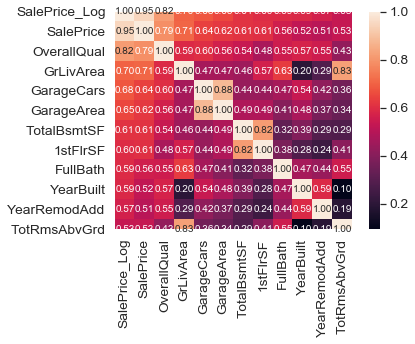

In [37]:
#kaggle参考
#saleprice correlation matrix
k = 10 + 2 #number of variables for heatmap
cols = corr_matrix.nlargest(k, 'SalePrice_Log')['SalePrice_Log'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True,
                 fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

- 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。

1. OverallQual: Rates the overall material and finish of the house\
オーバーオールクオリティ:住宅の仕上げ材料を10段階で格付け

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

2. GrLivArea: Above grade (ground) living area square feet\
地上リビングルームの平方フィート


3. GarageCars: Size of garage in car capacity\
車の駐車可能台数（ガレージのサイズを車の収容数で単位化）


4. arageArea: Size of garage in square feet\
平方フィート単位のガレージのサイズ\
GarageAreaとGarageCarsは単位を言い換えているだけで同じ列と考えられる。


5. TotalBsmtSF: Total square feet of basement area\
地下エリアの合計平方フィート


6. 1stFlrSF: First Floor square feet\
1階フロアの平方フィート\
TotalBsmtSFと1stFlrSFは似た数値になるものと考えられる。


7. FullBath: Full bathrooms above grade\
地上フルバスルーム(浴槽・シャワー・洗面台・便器の4点の備え付け)


8. YearBuilt: Original construction date\
オリジナル竣工日(Originalの指摘により改築等を除外している。)


9. YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)\
リモデル日(リモデル又は追加工事がなければYearBuiltに同じ）\
YearBuiltとYearRemodAddは似た数値になるものと考えられる。


10. TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)\
地上合計部屋数(バスルームを含まない)

- 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。

- 1. GarageAreaとGarageCars(特徴量間の関連)
- 2. GrLivAreaとTotRmsAbvGrd(特徴量間の関連)
- 3. TotalBsmtSFと1stFlrSF(特徴量間の関連)
- 4. SalePrice_LogとOverallQual